# Preprocessing:

*Encode categorical data (e.g., 'Influencing Factor', 'Preferred Job') using one-hot encoding or MultiLabelBinarizer.



*Normalize numerical data (e.g., CGPA, skill ratings) using StandardScaler.


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


df = pd.read_csv("clean_data.csv")
columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert 'Prefer Job' and 'Influencing Factor' columns to string
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Splitting the multi-level categorical data into lists and strip extra spaces
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor'
mlb = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb.fit_transform(df['Influencing Factor']), columns=mlb.classes_, index=df.index)

# Using MultiLabelBinarizer for 'Prefer Job'
prefer_job_encoded = pd.DataFrame(mlb.fit_transform(df['Prefer Job']), columns=mlb.classes_, index=df.index)

# Combining encoded features with the original dataframe
df_encoded = pd.concat([df.drop(['Influencing Factor', 'Prefer Job'], axis=1), influencing_factors_encoded, prefer_job_encoded], axis=1)

df_encoded.head(10)
#df_encoded.to_csv("preprocess_data.csv")

,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,...,Govt Job,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing
0,3.84,2,2,3,2,2,3,2,2,1,...,0,0,0,0,0,0,0,1,0,0
1,2.50,1,1,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,1,0
2,3.34,2,2,2,1,1,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3.78,2,2,2,2,1,2,2,1,1,...,0,0,0,0,0,0,0,1,0,0
4,3.00,2,2,3,2,2,2,3,3,3,...,0,0,0,0,0,0,0,1,0,0
5,3.30,0,3,3,3,2,2,3,3,3,...,0,0,0,0,0,0,0,1,0,0
6,3.30,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
7,3.10,2,2,1,1,2,2,2,3,1,...,0,0,0,0,0,0,0,1,0,0
8,3.91,1,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,3.25,2,1,2,1,1,2,2,2,3,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering:
*Create new features by combining existing ones, such as average skill rating or the total number of projects/publications.



*Use Principal Component Analysis (PCA) to reduce the dimensionality of the data.

In [2]:
# Example: Calculate average skill rating

skills = ['cgpa', 
          'Critical Thinking', 
          'Problem Solving', 
          'Team Work', 
          'Communication Skill', 
          'Software Engineering Principal',
          'Data Structure & Algorithm', 
          'Database Management', 
          'Data Analysis skill', 
          'Web Developing Skill', 
          'Understanding of computer architecture & System',
          'Understanding Operating System', 
          'Networking Concept',
          'Cyber Security Skill',
          'Machine Learning Skill', 
          'Robotics Skill',
          'Research Skill',
          'publication',
          'project'
         ]
df_encoded['Average Skill Rating'] = df_encoded[skills].mean(axis=1)


# Example: Calculate total projects and publications
df_encoded['Total Projects/Publications'] = df_encoded['project'] + df_encoded['publication']



# Example: Count skills rated above a certain threshold
threshold = 2  # Example threshold for skill rating
df_encoded['Skill Diversity'] = (df_encoded[skills] > threshold).sum(axis=1)


# Example: Create a feature for Machine Learning and Data Analysis combination
df_encoded['ML_DA_Combination'] = (df_encoded['Machine Learning Skill'] > 0) & (df_encoded['Data Analysis skill'] > 0)



df_encoded

,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,Data Analysis skill,Web Developing Skill,...,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing,Average Skill Rating,Total Projects/Publications,Skill Diversity,ML_DA_Combination
0,3.84,2,2,3,2,2,3,2,2,1,...,0,0,0,1,0,0,1.623158,3,3,True
1,2.50,1,1,1,1,1,1,1,1,2,...,0,0,0,0,1,0,1.026316,0,1,True
2,3.34,2,2,2,1,1,2,1,1,1,...,0,0,0,1,0,0,1.333684,2,1,True
3,3.78,2,2,2,2,1,2,2,1,1,...,0,0,0,1,0,0,1.567368,1,1,True
4,3.00,2,2,3,2,2,2,3,3,3,...,0,0,0,1,0,0,2.263158,5,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,3.46,2,2,3,0,1,1,2,2,1,...,0,0,0,0,0,0,1.603158,2,2,True
421,3.22,2,3,3,3,3,3,3,2,3,...,0,0,0,1,0,0,2.643158,6,11,True
422,3.39,2,2,2,2,2,1,2,2,2,...,1,0,0,0,0,0,2.125789,3,5,True
423,3.45,1,2,2,2,2,3,3,3,2,...,0,0,0,0,0,0,2.286842,4,8,True


# Principal Component Analysis (PCA)

Explained variance ratio: [0.20677266 0.07131099 0.06071917 0.05272071 0.05020086 0.03899241
 0.03587482 0.03355139 0.02907997 0.02613686 0.02514138 0.02480502]


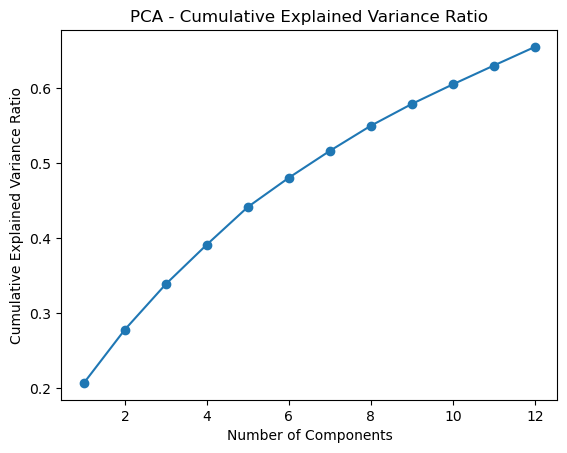

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  

# Assuming df_encoded and other variables are defined as in your previous code

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)  # Assuming 'Student ID' is not a feature

# Initialize PCA with desired number of components
n_components = 12  # Example: Reduce to 10 principal components
pca = PCA(n_components=n_components)

# Fit PCA and transform data
pca_result = pca.fit_transform(scaled_data)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize cumulative explained variance ratio
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()


# check every prefer job accuracy

In [4]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb


df = pd.read_csv("clean_data.csv")
columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)


df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)


columns_to_drop = ['Influencing Factor', 'Prefer Job']  
df = df.drop(columns_to_drop, axis=1)


df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
# prediction start
#df

X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded


numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42))
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Hard Voting Classifier
hard_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard'))
hard_voting.fit(X_train, y_train)
y_pred_hv = hard_voting.predict(X_test)

# Soft Voting Classifier
soft_voting = MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft'))
soft_voting.fit(X_train, y_train)
y_pred_sv = soft_voting.predict(X_test)

# Function to create a DataFrame with algorithms as rows and job categories as columns
def predictions_to_dataframe(y_preds, model_names, job_categories):
    predictions_dict = {}
    for y_pred, model_name in zip(y_preds, model_names):
        model_predictions = []
        for category in job_categories:
            prediction_percentage = (y_pred[:, mlb_prefer_job.classes_ == category].sum() / len(y_pred)) * 100
            model_predictions.append(f"{prediction_percentage:.2f}%")
        predictions_dict[model_name] = model_predictions
    predictions_df = pd.DataFrame(predictions_dict, index=job_categories)
    return predictions_df

# Get job categories from MultiLabelBinarizer
job_categories = mlb_prefer_job.classes_

# Collect predictions and model names
y_preds = [y_pred_lr,y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_gb,  y_pred_hv, y_pred_sv]
model_names = ["Logistic Regression","Decision Tree", "Random Forest", "XGBoost Classifier", "Gradient Boosting", 
                "Hard Voting Classifier", "Soft Voting Classifier"]


predictions_df = predictions_to_dataframe(y_preds, model_names, job_categories)


predictions_df = predictions_df.T



predictions_df.to_csv('predictions.csv')

predictions_df

,Abroad,BCS,Bank Job,Business,Cyber Security,Data Analysis,Database Administration,Gaming,Govt Job,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing
Logistic Regression,10.59%,5.88%,5.88%,0.00%,4.71%,9.41%,1.18%,0.00%,4.71%,0.00%,14.12%,0.00%,5.88%,3.53%,5.88%,54.12%,3.53%,0.00%
Decision Tree,17.65%,21.18%,11.76%,9.41%,12.94%,20.00%,12.94%,2.35%,22.35%,3.53%,17.65%,3.53%,16.47%,15.29%,11.76%,48.24%,21.18%,5.88%
Random Forest,14.12%,4.71%,7.06%,1.18%,5.88%,5.88%,2.35%,0.00%,8.24%,0.00%,12.94%,1.18%,3.53%,7.06%,7.06%,51.76%,8.24%,0.00%
XGBoost Classifier,16.47%,8.24%,11.76%,3.53%,9.41%,11.76%,4.71%,0.00%,15.29%,0.00%,15.29%,3.53%,5.88%,7.06%,7.06%,47.06%,14.12%,3.53%
Gradient Boosting,14.12%,8.24%,11.76%,1.18%,9.41%,8.24%,3.53%,0.00%,7.06%,1.18%,12.94%,1.18%,8.24%,7.06%,9.41%,48.24%,10.59%,3.53%
Hard Voting Classifier,14.12%,5.88%,7.06%,1.18%,7.06%,8.24%,1.18%,0.00%,9.41%,0.00%,12.94%,1.18%,8.24%,7.06%,7.06%,51.76%,8.24%,0.00%
Soft Voting Classifier,16.47%,9.41%,7.06%,1.18%,9.41%,9.41%,5.88%,0.00%,14.12%,0.00%,12.94%,1.18%,11.76%,7.06%,7.06%,50.59%,11.76%,1.18%


# check Accuracy & Hamming Loss:

In [5]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\n")

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XGBoost Classifier")
evaluate_model(y_test, y_pred_hv, "Hard Voting Classifier")
evaluate_model(y_test, y_pred_sv, "Soft Voting Classifier")


Results for Logistic Regression:
Accuracy: 15.29%
Hamming Loss: 0.10915032679738562
F1 Score (micro): 0.44518272425249167
F1 Score (macro): 0.28386243386243387


Results for Decision Tree:
Accuracy: 30.59%
Hamming Loss: 0.11764705882352941
F1 Score (micro): 0.5754716981132075
F1 Score (macro): 0.4766659241989286


Results for Random Forest:
Accuracy: 44.71%
Hamming Loss: 0.06601307189542484
F1 Score (micro): 0.6752411575562701
F1 Score (macro): 0.5099421520219001


Results for Gradient Boosting:
Accuracy: 34.12%
Hamming Loss: 0.0784313725490196
F1 Score (micro): 0.6385542168674699
F1 Score (macro): 0.5175257748928247


Results for XGBoost Classifier:
Accuracy: 41.18%
Hamming Loss: 0.06928104575163399
F1 Score (micro): 0.6954022988505747
F1 Score (macro): 0.5938438104316196


Results for Hard Voting Classifier:
Accuracy: 41.18%
Hamming Loss: 0.07254901960784314
F1 Score (micro): 0.6520376175548589
F1 Score (macro): 0.49834664040835297


Results for Soft Voting Classifier:
Accuracy: 42.3

# XGBoost 

In [6]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb


df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string 
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job'] 
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)


# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("full data shape :",X.shape)
print("training data shape : ",X_train.shape)
print("test data shape : ",X_test.shape)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
xgb_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained XGBoost model
    y_pred_prob = xgb_model.predict_proba(input_df)


    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


full data shape : (425, 25)
training data shape :  (340, 25)
test data shape :  (85, 25)
Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 98.26%
Researcher: 23.26%
Software Development: 22.06%
Teaching: 21.19%
Cyber Security: 7.70%
Data Analysis: 6.98%
UI/UX Designing: 1.55%
Database Administration: 1.00%
Gaming: 0.51%
ML/AI Engineer: 0.43%
Business: 0.26%
Govt Job: 0.25%
Management: 0.19%
Other: 0.17%
Networking: 0.11%
Bank Job: 0.08%
BCS: 0.08%
Hardware Sector: 0.01%


# Support Vector Machines (SVM)

In [7]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have already read and processed your data similar to previous examples
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machines (SVM)
svm_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained SVM model
    y_pred_prob = svm_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 94.34%
Data Analysis: 54.28%
Researcher: 47.31%
Govt Job: 19.05%
Teaching: 14.96%
Bank Job: 13.46%
Software Development: 11.53%
Database Administration: 9.97%
Business: 8.60%
BCS: 8.02%
Management: 6.42%
UI/UX Designing: 5.83%
Networking: 5.46%
ML/AI Engineer: 5.19%
Other: 3.90%
Cyber Security: 3.15%
Hardware Sector: 0.25%
Gaming: 0.09%


# RandomForestClassifier

In [8]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Assuming you have already read and processed your data similar to previous examples
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Classifier
rfc_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rfc_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained RandomForest model
    y_pred_prob = rfc_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 55.00%
Data Analysis: 38.00%
Researcher: 36.00%
Teaching: 36.00%
ML/AI Engineer: 32.00%
Software Development: 23.00%
Govt Job: 19.00%
Other: 19.00%
Cyber Security: 18.00%
Bank Job: 14.00%
Database Administration: 13.00%
BCS: 11.00%
Management: 9.00%
Networking: 8.00%
UI/UX Designing: 8.00%
Business: 4.00%
Gaming: 3.00%
Hardware Sector: 1.00%


# Neural Networks

In [9]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

# Assuming you have already read and processed your data similar to previous examples
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP Classifier
mlp_model = OneVsRestClassifier(MLPClassifier(random_state=42, max_iter=1000))
mlp_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained MLP model
    y_pred_prob = mlp_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 3,
    'Team Work': 3,
    'Communication Skill': 2,
    'Software Engineering Principal': 3,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


Predicted Prefer Job Categories with Probabilities (Descending Order):
Software Development: 100.00%
ML/AI Engineer: 24.32%
Database Administration: 1.53%
Data Analysis: 0.71%
Cyber Security: 0.62%
Other: 0.50%
Management: 0.23%
Business: 0.05%
Abroad: 0.01%
Teaching: 0.00%
UI/UX Designing: 0.00%
Gaming: 0.00%
Hardware Sector: 0.00%
Researcher: 0.00%
Govt Job: 0.00%
Bank Job: 0.00%
Networking: 0.00%
BCS: 0.00%


# LogisticRegression

In [10]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Read CSV file
df = pd.read_csv('clean_data.csv')

columns_to_drop = ['Unnamed: 0','year','gender','university_name']
df = df.drop(columns_to_drop, axis=1)

# Convert columns to string if necessary (already done in your case)
df['Prefer Job'] = df['Prefer Job'].astype(str)
df['Influencing Factor'] = df['Influencing Factor'].astype(str)

# Split 'Influencing Factor' and 'Prefer Job' into lists
df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']),
                                           columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']),
                                  columns=mlb_prefer_job.classes_, index=df.index)

print(prefer_job_encoded)

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Influencing Factor', 'Prefer Job']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Split the data into features (X) and labels (y)
X = df.drop(prefer_job_encoded.columns, axis=1)  # Features
y = prefer_job_encoded  # Labels

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with OneVsRestClassifier
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))  # Increase max_iter if necessary
lr_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_, index=input_df.index)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained Logistic Regression model
    y_pred_prob = lr_model.predict_proba(input_df)

    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(mlb_prefer_job.classes_):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'cgpa': 3.7,
    'Critical Thinking': 1,
    'Problem Solving': 2,
    'Team Work': 3,
    'Communication Skill': 2,
    'Software Engineering Principal': 2,
    'Data Structure & Algorithm': 2,
    'Database Management': 3,
    'Data Analysis skill': 2,
    'Web Developing Skill': 2,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1,  # Check spelling against X_train columns
    'Robotics Skill': 0,
    'Research Skill': 0,
    'publication': 0,
    'project': 3,
    'Influencing Factor': 'Salary, Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


     Abroad  BCS  Bank Job  Business  Cyber Security  Data Analysis  \
0         0    0         0         0               0              0   
1         0    0         0         0               0              0   
2         0    0         0         0               0              0   
3         0    0         0         0               0              0   
4         0    0         0         0               0              0   
..      ...  ...       ...       ...             ...            ...   
420       0    1         1         0               0              0   
421       0    0         0         0               0              0   
422       0    0         0         0               1              0   
423       0    0         0         0               0              1   
424       1    0         0         0               0              0   

     Database Administration  Gaming  Govt Job  Hardware Sector  \
0                          0       0         0                0   
1            

# Model Evaluation:

*Evaluate the models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.



*Use cross-validation to ensure the model's robustness.

In [11]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

# Load your CSV file
df = pd.read_csv("clean_data.csv")

# Drop original 'Influencing Factor' and 'Prefer Job', and concatenate encoded columns
columns_to_drop = ['Unnamed: 0','year','gender','university_name']  # Drop original columns after encoding
df = df.drop(columns_to_drop, axis=1)


# Convert 'Prefer Job' and 'Influencing Factor' columns to string and split into lists
df['Prefer Job'] = df['Prefer Job'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Influencing Factor'] = df['Influencing Factor'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

# Drop original columns and combine encoded features with the dataframe
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),
    'Hard Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='hard')),
    'Soft Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    #f1 = cv_results['test_f1_macro'].mean()
   # roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    #print(f"F1-score: {f1:.2f}")
   # print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


Evaluating Logistic Regression...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Logistic Regression:
Accuracy: 0.14
Precision: 0.41
Recall: 0.21


Evaluating Decision Tree...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Decision Tree:
Accuracy: 0.33
Precision: 0.48
Recall: 0.52


Evaluating Random Forest...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Random Forest:
Accuracy: 0.43
Precision: 0.67
Recall: 0.44


Evaluating Gradient Boosting...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Gradient Boosting:
Accuracy: 0.33
Precision: 0.62
Recall: 0.44


Evaluating XGBoost Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for XGBoost Classifier:
Accuracy: 0.40
Precision: 0.64
Recall: 0.50


Evaluating Hard Voting Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Hard Voting Classifier:
Accuracy: 0.41
Precision: 0.68
Recall: 0.44


Evaluating Soft Voting Classifier...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: Use

Cross-validation results for Soft Voting Classifier:
Accuracy: 0.39
Precision: 0.65
Recall: 0.47




In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb

# Load your CSV file
df = pd.read_csv("C:\\jupyter_work\\rrr_data.csv")

# Convert 'Prefer Job' and 'Influencing Factor' columns to string and split into lists
df['Prefer Job'] = df['Prefer Job'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Influencing Factor'] = df['Influencing Factor'].astype(str).apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

# Drop original columns and combine encoded features with the dataframe
columns_to_drop = ['Influencing Factor', 'Prefer Job']
df = df.drop(columns_to_drop, axis=1)
df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

# Splitting the data into features and labels
X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

# Identify numerical columns for scaling
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=10000, random_state=42)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(random_state=42)),
    'Hard Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='hard')),
    'Soft Voting Classifier': MultiOutputClassifier(VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=10000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ], voting='soft'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\jupyter_work\\rrr_data.csv'

In [ ]:
import numpy as np

# Update softmax prediction logic for multi-label classification
def predict_with_threshold(model, X_test, threshold=0.5):
    # Get the probability distribution (predict_proba) for models that support it
    proba = model.predict_proba(X_test)
    
    # Convert probabilities into binary predictions based on the threshold
    # proba is a list of arrays, so we iterate over it and apply the threshold
    return np.array([np.where(p >= threshold, 1, 0) for p in proba]).T

# Evaluate models using thresholded predictions for multi-label classification
def evaluate_model_thresholded(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("F1 Score (micro):", f1_score(y_test, y_pred, average='micro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\n")

# Apply the new threshold-based prediction and evaluation for each model
y_pred_lr_threshold = predict_with_threshold(lr, X_test)
evaluate_model_thresholded(y_test, y_pred_lr_threshold, "Logistic Regression")

y_pred_rf_threshold = predict_with_threshold(rf, X_test)
evaluate_model_thresholded(y_test, y_pred_rf_threshold, "Random Forest")

y_pred_gb_threshold = predict_with_threshold(gb, X_test)
evaluate_model_thresholded(y_test, y_pred_gb_threshold, "Gradient Boosting")

y_pred_xgb_threshold = predict_with_threshold(xgb_model, X_test)
evaluate_model_thresholded(y_test, y_pred_xgb_threshold, "XGBoost Classifier")
